In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [6]:
df = pd.read_csv('210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv')

In [7]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [8]:
# dropping all columns but the first five, which are the important ones
df = df.drop(df.columns[5:], axis=1)
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN


In [9]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1995 non-null   object 
 1   AUSPRAEGUNG  1995 non-null   object 
 2   JAHR         1995 non-null   int64  
 3   MONAT        1995 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [10]:
df[df['WERT'].isnull()]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1717,Verkehrsunfälle,Verletzte und Getötete,2021,202108,NaN
1718,Verkehrsunfälle,Verletzte und Getötete,2021,202109,NaN
1719,Verkehrsunfälle,Verletzte und Getötete,2021,202110,NaN
1720,Verkehrsunfälle,Verletzte und Getötete,2021,202111,NaN


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 12 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1911 non-null   object 
 1   AUSPRAEGUNG  1911 non-null   object 
 2   JAHR         1911 non-null   int64  
 3   MONAT        1911 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.6+ KB


In [12]:
df.head(15)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
17,Alkoholunfälle,insgesamt,2020,202005,40.0
18,Alkoholunfälle,insgesamt,2020,202006,49.0
19,Alkoholunfälle,insgesamt,2020,202007,58.0
20,Alkoholunfälle,insgesamt,2020,202008,46.0
21,Alkoholunfälle,insgesamt,2020,202009,46.0


In [13]:
# creating a dataframe containing all observations without the sum
df_normal = df[df['MONAT'] != 'Summe']
# creating a dataframe containing only the sum observations
df_sum = df[df['MONAT'] == 'Summe']
print(sum(df_sum['WERT']) == sum(df_normal['WERT']))

True


In [14]:
df = df_normal

In [15]:
# creating a dataframe containing all observations without the sum
df_insgesamt = df[df['AUSPRAEGUNG'] == 'insgesamt']
# creating a dataframe containing only the sum observations
df_rest = df[df['AUSPRAEGUNG'] != 'insgesamt']
print(sum(df_insgesamt['WERT']) == sum(df_rest['WERT']))

False


In [16]:
df = df_insgesamt.drop('AUSPRAEGUNG', axis=1)

In [17]:
print(df.head())
print('-'*50)
print(df.dtypes)
print('-'*50)
print(df.MONATSZAHL.unique())

        MONATSZAHL  JAHR   MONAT  WERT
13  Alkoholunfälle  2020  202001  28.0
14  Alkoholunfälle  2020  202002  40.0
15  Alkoholunfälle  2020  202003  27.0
16  Alkoholunfälle  2020  202004  26.0
17  Alkoholunfälle  2020  202005  40.0
--------------------------------------------------
MONATSZAHL     object
JAHR            int64
MONAT          object
WERT          float64
dtype: object
--------------------------------------------------
['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']


In [18]:
df.head()

,MONATSZAHL,JAHR,MONAT,WERT
13,Alkoholunfälle,2020,202001,28.0
14,Alkoholunfälle,2020,202002,40.0
15,Alkoholunfälle,2020,202003,27.0
16,Alkoholunfälle,2020,202004,26.0
17,Alkoholunfälle,2020,202005,40.0


In [19]:
df['DATE'] = df['MONAT'].apply(lambda x: pd.Period(x[:-2] + '-' + x[-2:]).to_timestamp())
df = df[['MONATSZAHL', 'DATE', 'WERT']]
df.head()

,MONATSZAHL,DATE,WERT
13,Alkoholunfälle,2020-01-01,28.0
14,Alkoholunfälle,2020-02-01,40.0
15,Alkoholunfälle,2020-03-01,27.0
16,Alkoholunfälle,2020-04-01,26.0
17,Alkoholunfälle,2020-05-01,40.0


In [20]:
df.dtypes

MONATSZAHL            object
DATE          datetime64[ns]
WERT                 float64
dtype: object

In [21]:
df = df.groupby(['DATE', 'MONATSZAHL']).sum().unstack(level=1)
df.head()

WERT                              
MONATSZAHL Alkoholunfälle Fluchtunfälle Verkehrsunfälle
DATE                                                   
2000-01-01           78.0         835.0          3448.0
2000-02-01           53.0         890.0          3181.0
2000-03-01           73.0         974.0          3783.0
2000-04-01           78.0         834.0          3317.0
2000-05-01           96.0        1086.0          4123.0

In [22]:
# dropping the first level of the column index in order to contain only the categories
df = df.droplevel(0, axis=1)

In [23]:
# Looking at the data
df.head()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


MONATSZAHL  Alkoholunfälle  Fluchtunfälle  Verkehrsunfälle
count           252.000000     252.000000       252.000000
mean             43.753968     879.428571      3537.198413
std              18.069448     135.216334       479.649632
min              10.000000     411.000000      2251.000000
25%              30.750000     793.750000      3205.750000
50%              40.000000     877.500000      3487.000000
75%              53.250000     966.250000      3906.750000
max             107.000000    1187.000000      4763.000000


<AxesSubplot:>

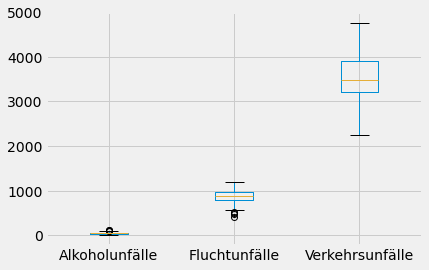

In [24]:
plt.style.use('fivethirtyeight')
print(df.describe())
df.boxplot()

In [25]:
import statsmodels.api as sm
categories = list(df.columns)
decomposition_dict = {}

In [26]:
for category in categories:
    decomposition = sm.tsa.seasonal_decompose(df[category])
    decomposition_dict[category] = decomposition

In [27]:
trend_dict = {}
seasonality_dict = {}

for category in categories:
    trend_dict[category] = decomposition_dict[category].trend

trend_df = pd.DataFrame.from_dict(trend_dict)

for category in categories:
    seasonality_dict[category] = decomposition_dict[category].seasonal

seasonality_df = pd.DataFrame.from_dict(seasonality_dict)

In [28]:
plt.style.use('fivethirtyeight')

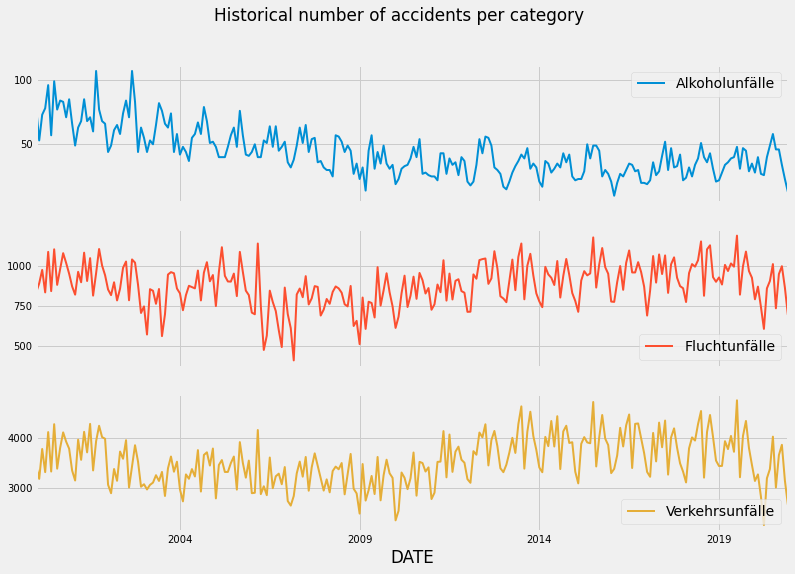

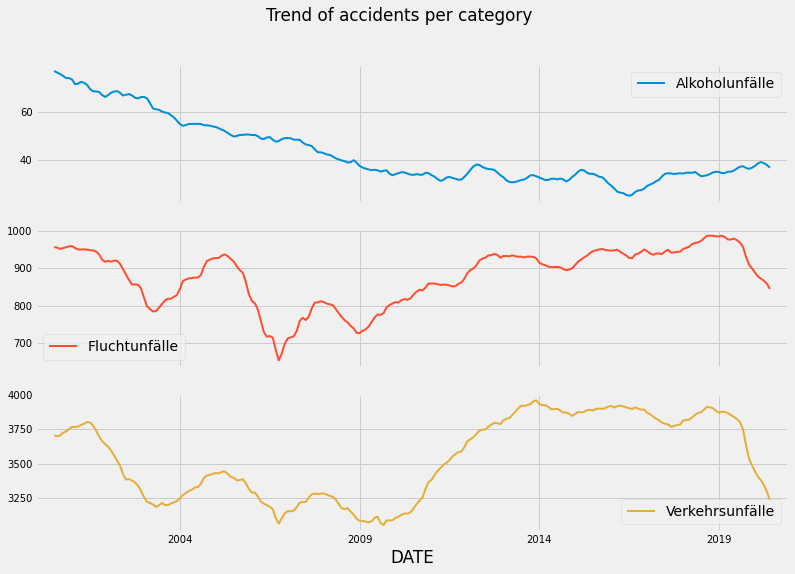

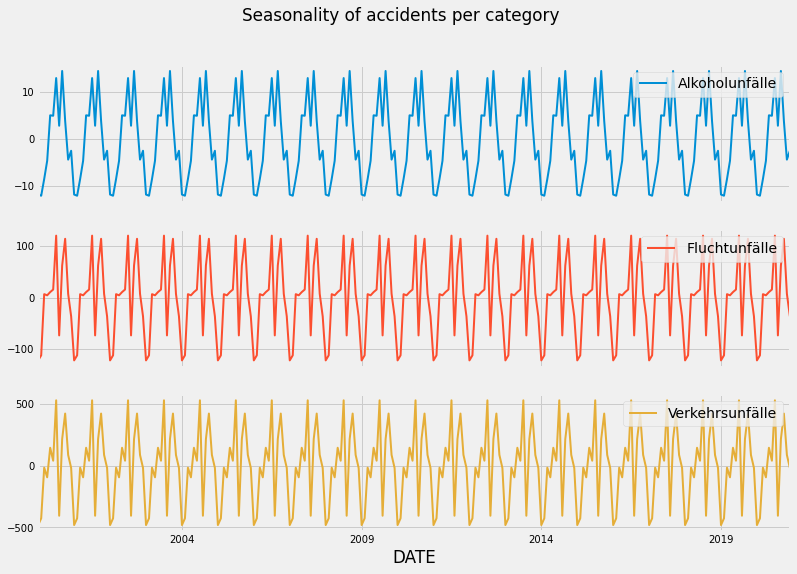

In [30]:
ax = df.plot(subplots=True, figsize=(12,8), fontsize=10, linewidth=2,
            title='Historical number of accidents per category')

ax3 = trend_df.plot(subplots=True, figsize=(12,8), fontsize=10, linewidth=2,
                    title='Trend of accidents per category')

ax4 = seasonality_df.plot(subplots=True, figsize=(12,8), fontsize=10, linewidth=2,
                          title='Seasonality of accidents per category')

In [31]:
df.to_csv('processed_dataframe.csv')